In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('insurance - insurance.csv')
df = df.drop_duplicates()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

## Null Hypothesis
    - There is no difference between smokers and non-smokers regarding the insurance charges. 
## Alternative Hypothesis
    - There is a difference between smokers and non-smokers regarding the insurance charges. 
    
## Data Type
    - Numeric
    
## Samples 
    - 2 samples
    
## Test
    - 2 Sample T-Test
    
## Assumptions
    - No significant outliers
    - Normality
    - Equal Variance

In [5]:
# seperate smokers from non-smokers
df_smoker = df[df['smoker']=='yes']
df_nonsmoker = df[df['smoker']=='no']

In [7]:
# seperate smoker charges from non-smoker charges
smoker_charges = df_smoker['charges']
nonsmoker_charges = df_nonsmoker['charges']

print("charges for smokers\n", smoker_charges)
print("charges for nonsmokers\n", nonsmoker_charges)

charges for smokers
 0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64
charges for nonsmokers
 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1063, dtype: float64


In [8]:
# Check for outliers in smokers charges
smoker_zscores= stats.zscore(smoker_charges)
smoker_outliers = abs(smoker_zscores)>3
print(np.sum(smoker_outliers))

0


In [9]:
# Check for outliers in nonsmokers charges
non_zscores= stats.zscore(nonsmoker_charges)
non_outliers = abs(non_zscores)>3
print(np.sum(non_outliers))

24


In [10]:
# remove outliers from nonsmoker charges
print(len(nonsmoker_charges))
nonsmoker_charges = nonsmoker_charges[non_outliers == False] 
print(len(nonsmoker_charges))

1063
1039


In [13]:
# check for normality
result = stats.normaltest(smoker_charges)
result

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [14]:
# check for normality
result = stats.normaltest(nonsmoker_charges)
result

NormaltestResult(statistic=163.70821423990097, pvalue=2.8262654970074626e-36)

    - because we have grater than 15 samples, we can ignore the requirment for normal distrabition

In [16]:
# levenes test
result = stats.levene(smoker_charges, nonsmoker_charges)
result

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

In [17]:
result = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var=False)
result

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)

    - our P-Value is significant, therfore we can reject our null hypothesis. 
    - we have support for the alternative hypothesis; there is a difference between smokers and non-smokers regarding the insurance charges. 

Mean smoker charges :  32050.23183153284
Mean non-smoker charges 7945.9246538585185


Text(0.5, 1.0, 'Insurance charges for smokers and non-smokers')

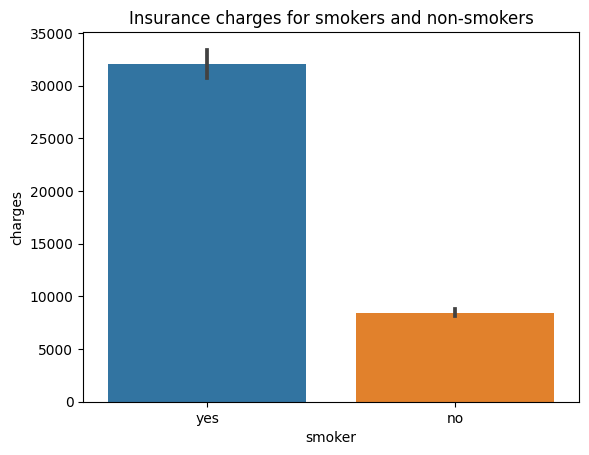

In [19]:
ax = sns.barplot(data=df, x='smoker', y='charges')
print("Mean smoker charges : ", smoker_charges.mean())
print("Mean non-smoker charges", nonsmoker_charges.mean())
ax.set_title('Insurance charges for smokers and non-smokers')


# Q2. Are men more likely to smoke than women?


# Q3. Do different regions have different charges, on average?